
# **Ocorrências de fadiga e distração ao volante: Uma análise descritiva dos dados usando Python**

É possível prever quando um motorista manifestará sintomas de fadiga ao dirigir? A fadiga tem causas diversas e seus sintomas se manifestam por um bocejo ou até mesmo passando curtos espaços de tempo de olhos fechados ao volante?
Uma das tecnologias desenvolvidas para identificar tais sintomas é através do reconhecimento deles na expressão facial dos motoristas.
A partir dos dados históricos de uma operação de transporte de passageiros sob regime de fretamento, realizou-se uma análise exploratória dos dados e das relações entre as ocorrências (Variável explicada) e dados de tempo e espaço referente a tais ocorrências.


##Carregando bibliotecas

In [ ]:
# Análise e manipulação
import pandas as pd
import numpy as np

# Visualização
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##Analisando os dados

In [ ]:
#Visualizando a estrutura do dataset
df = pd.read_csv("eventos.csv")
df.head()


,idveiculo,dia,mes,diadasemana,hora,Velocidade,Longitude,Latitude,Eventos
0,33,2,3,3,0.097778,32,-49.141701,-5.38801,3
1,34,24,3,4,0.397986,32,-49.131100,-5.37021,3
2,34,16,3,3,0.672743,25,-49.130100,-5.38569,3
3,1,18,4,1,0.753519,27,-49.126598,-5.37226,3
4,1,18,4,1,0.753553,16,-49.126400,-5.37213,3


**OBSERVAÇÕES:**

 Os dados categorizados (Strings) já foram convertidos em dados numéricos. Os meses foram substituidos pelos seus valores correspondentes (janeiro = 1, fevereiro = 2, etc...); os dias da semana seguem a ordem: domingo = 1, segunda = 2, etc...

Os tipos de evento também foram convertidos em numeros conforme abaixo:

*   "Bocejo" = 1
*   "Oclusão" = 2
*   "Olhando para baixo 1" = 3
*   "Olhando para baixo 2" = 4
*   "Sonolência 1" = 5
*   "Sonolência 2" = 6

*Olhando para baixo* signifca desviar o olhar da frente, N1 por em até 1,5 segundo e N2, 2,5 segundos.
*Sonolência* significa fechar o olho, 1 para 1,5 segundo e 2 para 2,5 segundos.
A ocorrência de *Sonolência 2* é o caso mais grave pois, passar 2,5 segundos, mesmo em baixa velocidade como 40km/h por exemplo, representa uma distância considerável que grande possibilidade de ocorrência de um acidente catratrófico.


In [ ]:
#Identificando o tipo de variável
df.dtypes

idveiculo        int64
dia              int64
mes              int64
diadasemana      int64
hora           float64
Velocidade       int64
Longitude      float64
Latitude       float64
Eventos          int64
dtype: object

As variáveis "idveiculo", "dia", "diadasemana", "mes" e "Eventos" são discretas e as variáveis "hora", "velocidade", "Latitude" e "Longitude" são contínuas.

**Estatística descritiva do dataset**

In [ ]:
df.describe()

,idveiculo,dia,mes,diadasemana,hora,Velocidade,Longitude,Latitude,Eventos
count,23801.000000,23801.000000,23801.000000,23801.00000,23801.000000,23801.000000,23801.000000,23801.000000,23801.000000
mean,102.073274,17.723205,4.658796,3.86135,0.497806,35.086635,-44.291831,-2.572519,2.994580
std,71.228369,9.336651,0.643196,1.85792,0.240141,11.742313,0.846938,0.146979,0.274268
min,1.000000,1.000000,3.000000,1.00000,0.000116,15.000000,-49.141701,-5.428300,1.000000
25%,46.000000,10.000000,4.000000,2.00000,0.287847,26.000000,-44.334400,-2.582080,3.000000
50%,78.000000,20.000000,5.000000,4.00000,0.423449,34.000000,-44.323898,-2.568040,3.000000
75%,170.000000,26.000000,5.000000,5.00000,0.730891,44.000000,-44.228802,-2.554150,3.000000
max,229.000000,31.000000,6.000000,7.00000,0.999907,79.000000,44.329201,2.571570,6.000000


**Distribuição de Frequência das Variáveis**

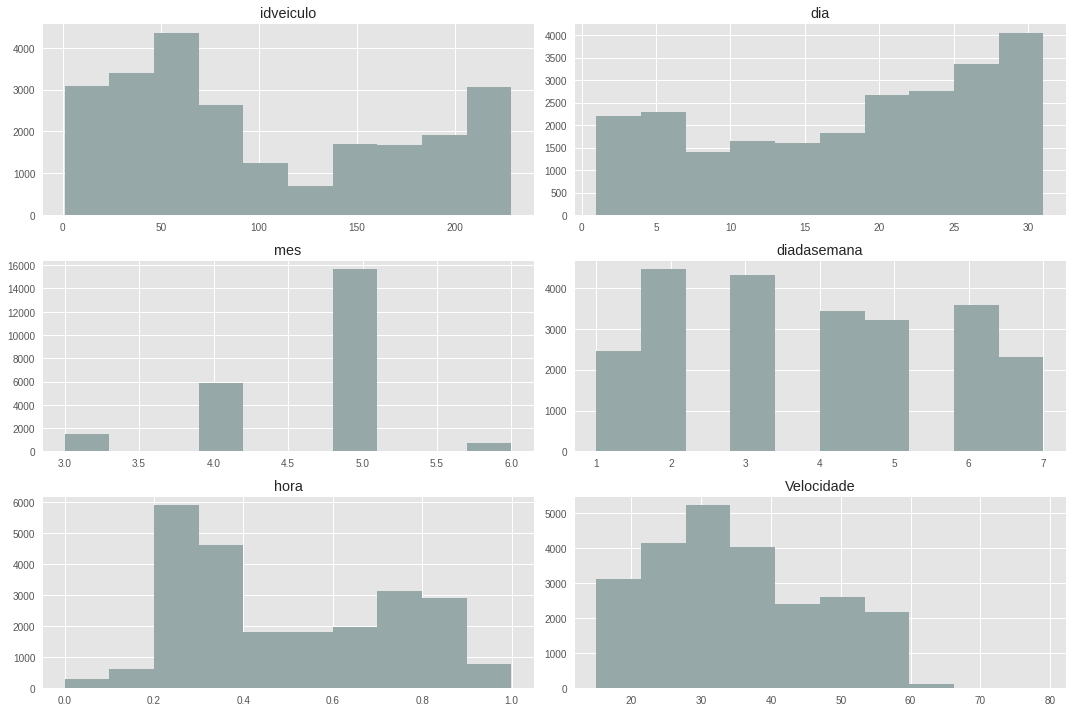

In [ ]:
df.hist(['idveiculo', 'dia', 'mes', 'diadasemana', 'hora', 'Velocidade'], figsize=(15,10), color='#96a8a8')

# Estilo dos gráficos
plt.style.use('seaborn')

# Ajustar o layout
plt.subplots_adjust( hspace=0.35, wspace=0.15 )

plt.tight_layout()

**Analisando a correlação entre as variáveis**

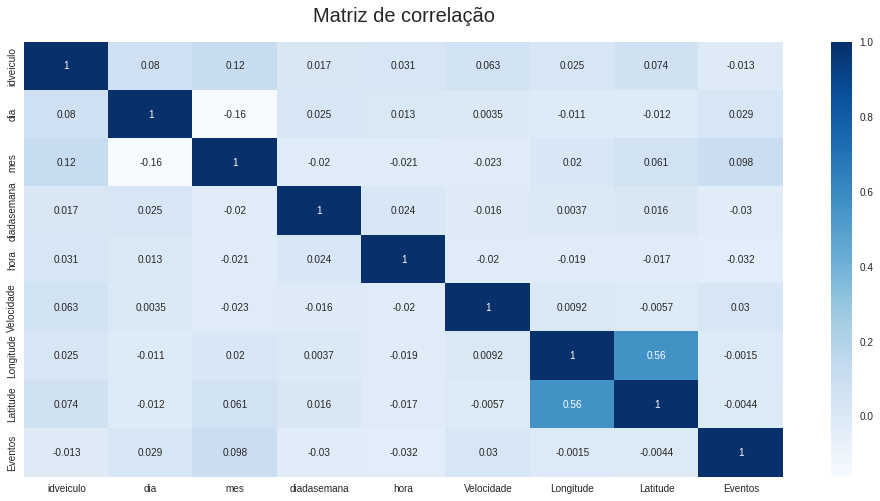

In [ ]:
# Mapa de calor de correlação
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(), annot = True, cmap='Blues')
plt.title('Matriz de correlação', fontsize = 20, pad = 20)
plt.show()

Observando as correlações entre os "eventos" e as demais variáveis, todas correlação muito baixa, numa escala de "zero" a "1", os valores não passam de 10%.

##Analisando a Variável "Eventos"


In [ ]:
#Contangem de Eventos por Tipo
df['Eventos'].value_counts().to_frame()

,Eventos
3,23326
1,251
5,185
2,19
4,19
6,1


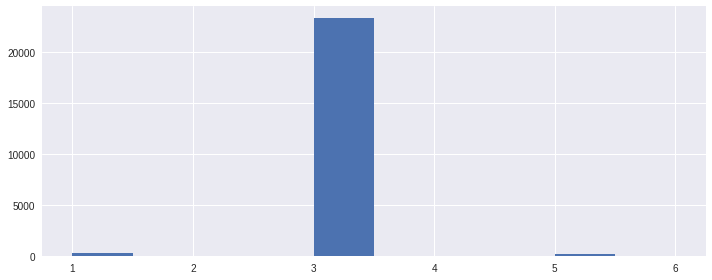

In [ ]:
# Plotando o gráfico com a quantidade de ocorrências por tipo de "Evento"
plt.figure(figsize=(10,4));
df['Eventos'].hist()
plt.tight_layout()

Nota-se quantidade do evento "3" é extremamente superior aos demais e esse fato exigiu um aprofundamento do entendimento do dado. 



Analisando a origem do dado, da forma como é captada pelo sistema de detecção de fadiga e sonolência até o critério lógico do sistema para considera-lo uma ocorrência válida, identificou-se com o sendo considerando uma falha no sistema de detecção - equipamento muito "sensível" à captação do "olhar para baixo" em até 1,5 segundos. Criou-se um novo dataset sem esses dados. 

In [ ]:
df.head()

,idveiculo,dia,mes,diadasemana,hora,Velocidade,Longitude,Latitude,Eventos
0,33,2,3,3,0.097778,32,-49.141701,-5.38801,3
1,34,24,3,4,0.397986,32,-49.131100,-5.37021,3
2,34,16,3,3,0.672743,25,-49.130100,-5.38569,3
3,1,18,4,1,0.753519,27,-49.126598,-5.37226,3
4,1,18,4,1,0.753553,16,-49.126400,-5.37213,3


In [ ]:
#filtrando o Evento 3 para construção do novo Dataframe
filtro  = df['Eventos'] != 3
df2 = df[filtro]
df2.head()
df2.value_counts().to_frame()
df2.shape

(475, 9)

In [ ]:
df2.head()


,idveiculo,dia,mes,diadasemana,hora,Velocidade,Longitude,Latitude,Eventos
59,37,10,3,4,0.836736,21,-44.379200,-2.56318,1
61,37,8,3,2,0.399965,18,-44.378601,-2.56403,1
67,11,20,4,3,0.930914,18,-44.377800,-2.56415,1
72,150,13,4,3,0.677465,15,-44.377701,-2.55297,2
79,37,10,3,4,0.879120,23,-44.377399,-2.56419,1


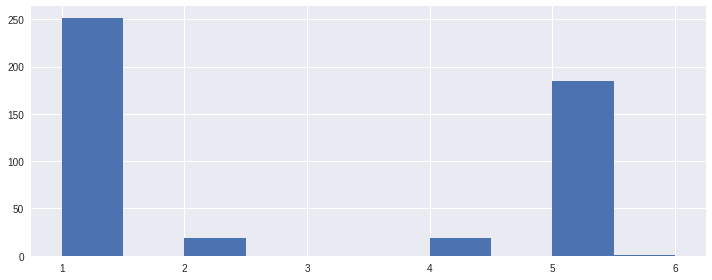

In [ ]:
# Plotando o gráfico com a quantidade de ocorrências por tipo de "Evento" após a correção da base
plt.figure(figsize=(10,4));
df2['Eventos'].hist()
plt.tight_layout()

Para analisar a relação dos eventos com as demais variávis, verificou-se então a distribuição dos eventos ao longo do tempo:

1.   Ao longo do dia;
2.   Ao longo da semana e; 
2.   Ao longo dos meses

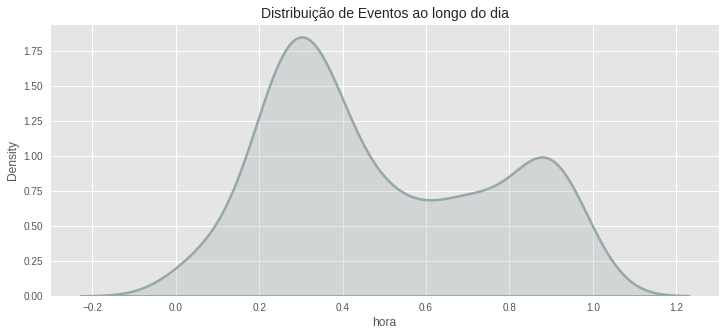

In [ ]:
# Ao longo do dia

# Tamanho
plt.figure( figsize=(12, 5) )

# Estilo
plt.style.use('ggplot')

# titulo
plt.title('Distribuição de Eventos ao longo do dia', loc='center', fontsize=14 )

# Plot
sns.kdeplot(df2['hora'], color='#96a8a8', shade=True,linewidth=2.5 );

O gráfico sugere 2 "picos" de ocorrências de eventos, um que corresponderia ao horario de entrada dos empregados e o outro na saída do turno da noite. Obviamente os picos coincidem com os momentos de marior movimentação dos empregados pois nos horários intermediários, a maioria dos veiculos estão na garagem e alguns poucos fazem viagens de distribuição interna na empresa.

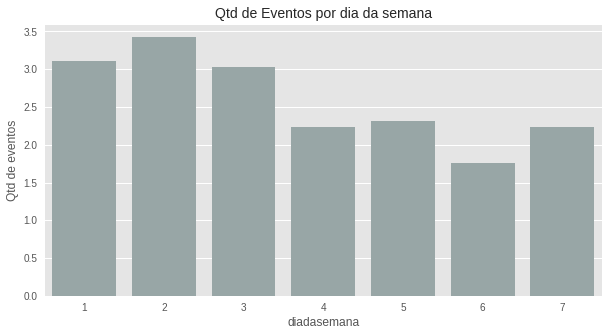

In [ ]:
# Ao longo da semana


# Tamanho da imagem
plt.figure( figsize=(10, 5) )

# Titulo
plt.title('Qtd de Eventos por dia da semana', loc='center', fontsize=14 )

# Grafico
sns.barplot( data=df2, x='diadasemana', y='Eventos', ci=None, color='#96a8a8')

# Label
plt.ylabel('Qtd de eventos');

Os dados sugerem um volume superior de ocorrências às segundas-feiras. O fato da realidade que pode explicar essa tendência é a possibilidade dos motoristas que rodam às segundas não cumprirem o repouso necessário no final de semana para começar a semana com a disposição necessária para o exercicio da função.

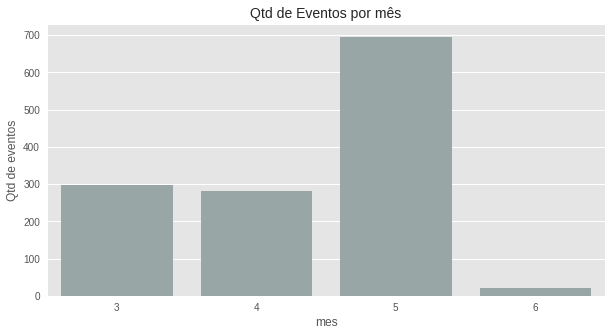

In [ ]:
# Ao longo dos meses

# Tamanho da imagem
plt.figure( figsize=(10, 5) )

# Titulo
plt.title('Qtd de Eventos por mês', loc='center', fontsize=14 )

# Grafico
sns.barplot( data=df2, x='mes', y='Eventos', ci=None, color='#96a8a8', estimator=sum )

# Label
plt.ylabel('Qtd de eventos');

**Ocorrências por velocidade**

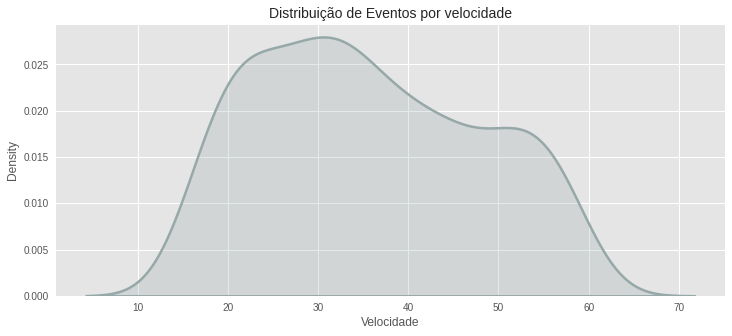

In [ ]:
# Ao longo do dia

# Tamanho
plt.figure( figsize=(12, 5) )

# Estilo
plt.style.use('ggplot')

# titulo
plt.title('Distribuição de Eventos por velocidade', loc='center', fontsize=14 )

# Plot
sns.kdeplot(df2['Velocidade'], color='#96a8a8', shade=True, linewidth=2.5);


Quando observa-se a velocidade, 2 picos; um de baixa velocidade (30km/h) e o segundo proximo aos 60km/h. O pico de baixa velocidade pode ocorrer nos dados pois grande parte dos deslocamentos ocorrem dentro da área da empresa onde a velocidade é controlada, e o pico de 60km/h, no trânsito da própria cidade.

Observando os tipos de ocorrências pela velocidade ao longo do dia

In [ ]:
px.scatter(df2, x="hora", y="Eventos", color= "Velocidade", size="Velocidade", marginal_x="histogram", color_continuous_scale=px.colors.cyclical.IceFire)

Observando as ocorrências no território


In [ ]:
df = px.data.iris()
figgeo = px.scatter_mapbox(df2, lat="Latitude", lon="Longitude", color="Velocidade", size="Eventos",
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                  mapbox_style="carto-positron")
figgeo.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
figgeo.show()